# Ejercicio 4: Modelo Probabilístico

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

## Parte 0: Carga del Corpus

In [49]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

In [50]:
# Tipo de variable
print(type(newsgroupsdocs))

<class 'list'>


In [51]:
import sys

# Obtenemos el tamaño de la variable
tamano = sys.getsizeof(newsgroupsdocs)

# Imprimimos el resultado en megabytes
print(f"El tamaño de la lista en memoria es: {tamano} bytes")

El tamaño de la lista en memoria es: 150824 bytes


## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [53]:
vectorizer.fit(newsgroupsdocs) # Entrenamiento
corpus_vect = vectorizer.transform(newsgroupsdocs) # Transformación

In [54]:
print(corpus_vect.shape)

(18846, 134410)


In [ ]:
# biblioteca nltk
# doc 18846
# términos 134410
# con la aplicación de nltk 23146

In [55]:
import pandas as pd

# Matriz de términos (TF)
matrix_tf = pd.DataFrame(corpus_vect.toarray(), columns=vectorizer.get_feature_names_out())
matrix_tf
# matrix_tf.T

,00,000,0000,00000,000000,00000000,0000000004,00000000b,00000001,00000001b,...,zzs,zzvsi,zzy_3w,zzz,zzzoh,zzzzzz,zzzzzzt,³ation,ýé,ÿhooked
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
import numpy as np

# Cálculo de DF
df = np.array((corpus_vect > 0).sum(axis=0)).flatten()

# Create TF/DF DataFrame
df_tf = pd.DataFrame({'Term': vectorizer.get_feature_names_out(), 'DF': df})
df_tf

,Term,DF
0,00,402
1,000,455
2,0000,10
3,00000,7
4,000000,1
...,...,...
134405,zzzzzz,1
134406,zzzzzzt,1
134407,³ation,1
134408,ýé,1


In [57]:
# Obtener valores de IDF
idf_values = vectorizer.idf_
idf_tf = pd.DataFrame({'Term': vectorizer.get_feature_names_out(), 'IDF': idf_values})
idf_tf

,Term,IDF
0,00,4.845172
1,000,4.721616
2,0000,8.446214
3,00000,8.764667
4,000000,10.150962
...,...,...
134405,zzzzzz,10.150962
134406,zzzzzzt,10.150962
134407,³ation,10.150962
134408,ýé,10.150962


## Parte 2: Ranking de documentos usando TF-IDF

### Actividad

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

Comparar el vector query con los documentos, significa medir la distancia coseno

In [58]:
query = "chicken"
quer_vect = vectorizer.transform([query])
# Calcular el vector query, encontrar el indice y obtener los documentos relacionados
# Mostrar una interfaz que muestre los documentos relacionados, opcional order de mayor a menor relevancia con paginación

In [59]:
print(quer_vect.shape)

(1, 134410)


In [60]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular similitudes entre consulta y documentos
cosine_similarities = cosine_similarity(quer_vect, corpus_vect).flatten()

# Crear un DataFrame con los datos
df_resultados = pd.DataFrame({'Documento': newsgroupsdocs, 'Similitud coseno': cosine_similarities})
df_resultados = df_resultados.sort_values(by='Similitud coseno', ascending=False)
tf_idf_results = df_resultados.head(10)
tf_idf_results
# Normalización de datos

,Documento,Similitud coseno
1315,\nBut remember that had God extinguished the b...,0.269169
13222,You are right in supposing that the problem is...,0.213187
15919,"\nWetteland comes off the DL on April 23rd, an...",0.193458
9048,I am 35 and am recovering from a case of Chick...,0.176817
357,i read about the code you can put in to most a...,0.158946
16902,"\n\n[stuff deleted...]\n\n \nAs I recall, the...",0.156495
5738,\n\nPlease note that Bill Clinton probably has...,0.150360
897,\n\nYou're reading far too much into this (asi...,0.148718
18061,This reminds me of the last Graham Kerr cookin...,0.086024
11732,These are MY last words on the subject\n\n\n\n...,0.085915


## Parte 3: Ranking con BM25

### Actividad

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

In [61]:
!pip install rank_bm25

In [63]:
from rank_bm25 import BM25Okapi
bm25_doc = BM25Okapi(newsgroupsdocs)
scores = bm25_doc.get_scores(query)

df = pd.DataFrame({'Documento': newsgroupsdocs, 'Score BM25': scores})
df = df.sort_values(by='Score BM25', ascending=False)
bm25_results = df.head(10)
bm25_results

,Documento,Score BM25
8017,\tThe Jets gave the Canucks another run for th...,10.974152
12695,"\n\nI don't know, but I'm as willing to specul...",10.970829
10554,"\n\nPardon me?\n\n""Greece Government Rail-Road...",10.970303
937,"\nOK, as one last attempt, I'll take a differe...",10.964170
6533,I have an idea as to why the encryption algori...,10.957434
6694,Hmmm...\n A possibility for the software regi...,10.956307
3311,-*----\n\nI think that Lee Lady and I are talk...,10.955699
59,"\nA word of warning, though: Kryptonite also ...",10.953104
956,Hi.\n\nI'm not sure what the other guy (can't ...,10.948166
10421,Here is a revised version of my summary which ...,10.948133


## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

In [64]:
import matplotlib.pyplot as plt

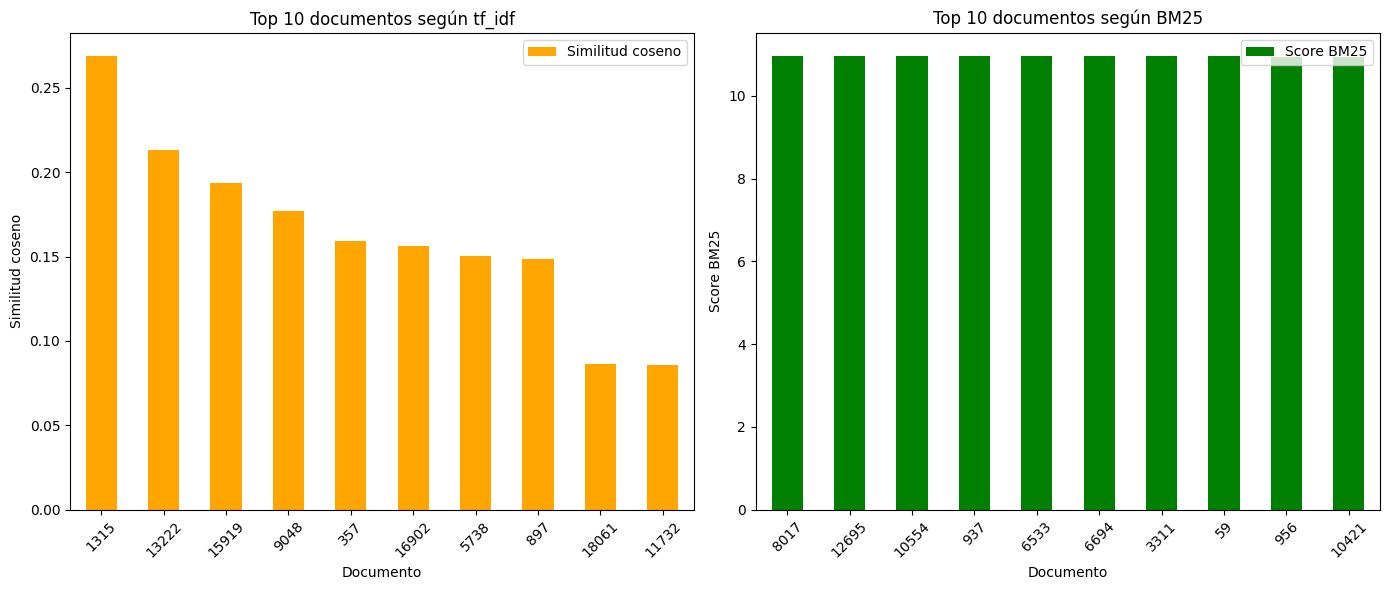

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

tf_idf_results.plot.bar(y='Similitud coseno', color='orange', ax=ax1)
ax1.set_title('Top 10 documentos según tf_idf')
ax1.set_ylabel('Similitud coseno')
ax1.set_xlabel('Documento')
ax1.tick_params(axis='x', rotation=45)

bm25_results.plot.bar(y='Score BM25', color='green', ax=ax2)
ax2.set_title('Top 10 documentos según BM25')
ax2.set_ylabel('Score BM25')
ax2.set_xlabel('Documento')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?  

Con el Modelo BM25 se obtienen documentos con scores altos.

Documento 8017 obtiene el score más alto (~10.98), seguido por documentos 12695, 10554, 937, etc.

Los scores van de ~10.95 a ~10.98, mostrando poca diferenciación visual entre los documentos más relevantes.

Mientras que el modelo tf_idf (similitud coseno) el documento más relevante es el 1315 con un score de (~0.27), seguido por el 13222 con un score de (~0.21)

En el modelo tf_idf si se nota una diferencia de los resultados.

Sugiere: ¿A qué se podría deber esta diferencia?

Las diferencias surgen porque:

TF-IDF prioriza documentos con repeticiones frecuentes de términos, independientemente de su longitud.

BM25 valora documentos con frecuencias moderadas de términos y longitudes equilibradas, ofreciendo rankings más precisos en escenarios reales.

Esta divergencia explica por qué los top 10 de cada método no coinciden y por qué BM25 muestra menor variación entre scores altos.

## Parte 5: Evaluación con consulta relevante

### Actividad

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

In [66]:
query = "Computers are tools"
quer_vect = vectorizer.transform([query])

In [67]:
def precision_at_3(ranked_docs, relevant_docs):
    """
    Calcula Precision@3.

    Args:
        ranked_docs (list): Lista ordenada de documentos (IDs) según el ranking (por ejemplo, tf_idf_results['Documento']).
        relevant_docs (list o set): Lista o conjunto de documentos relevantes definidos manualmente.

    Returns:
        float: Precision@3, valor entre 0 y 1.
    """
    top_3 = ranked_docs[:3]
    print('Top 3:', top_3)
    print('Relevant:', relevant_documents)

    relevant_in_top_3 = sum(1 for doc in top_3 if doc in relevant_docs)
    precision = relevant_in_top_3 / 3
    return precision

In [68]:
def average_precision(ranked_ids, relevant_ids):
    """
    Calcula el Average Precision (AP) para una consulta.

    Args:
        ranked_ids (list): Lista ordenada de IDs de documentos recuperados (por ejemplo, índice del DataFrame ordenado).
        relevant_ids (set o list): Conjunto o lista de IDs de documentos relevantes.

    Returns:
        float: Average Precision entre 0 y 1.
    """
    relevant_set = set(relevant_ids)
    num_relevant = 0
    precision_sum = 0.0

    for i, doc_id in enumerate(ranked_ids, start=1):
        if doc_id in relevant_set:
            num_relevant += 1
            precision_at_i = num_relevant / i
            precision_sum += precision_at_i

    if num_relevant == 0:
        return 0.0
    return precision_sum / num_relevant

In [69]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular similitudes entre consulta y documentos
cosine_similarities = cosine_similarity(quer_vect, corpus_vect).flatten()

# Crear un DataFrame con los datos
df_resultados = pd.DataFrame({'Documento': newsgroupsdocs, 'Similitud coseno': cosine_similarities})
df_resultados = df_resultados.sort_values(by='Similitud coseno', ascending=False)
tf_idf_results = df_resultados.head(10)
tf_idf_results

,Documento,Similitud coseno
2177,\nNot everyone should be trusted with tools. ;...,0.347493
15808,I am looking for GUI Builders/UIMS's which run...,0.259395
806,"Hello,\n\nI want a little network for 3 users....",0.248908
18667,\nI think your experiences under the Bulgarian...,0.224868
7522,\nPlease let us know if you get a solid answer...,0.220260
13827,\n\nWe have plenty of computer labs where the ...,0.214863
14979,"Hi there,\n\nDoes anyone know whether the PUFF...",0.213354
702,"Then again, maybe $2445 for the gateway system...",0.201724
15478,PC TOOLS 8.0\n\nall original disk & manual\nre...,0.201077
12752,: I'd appreciate any feedback on capture/playb...,0.196925


Documentos sugeridos como relevantes: 15808, 806, 18667, 7522, 14979, 15478, 12752.

Total: 7

In [70]:
# Lista ordenada de documentos según similitud coseno
ranked_ids = tf_idf_results.index.tolist()

# Documentos relevantes definidos manualmente
relevant_documents = [15808, 806, 18667, 7522, 14979, 15478, 12752]

# Calcular Precision@3
p3 = precision_at_3(ranked_ids, relevant_documents)
print(f"Precision@3: {p3:.2f}")

Top 3: [2177, 15808, 806]
Relevant: [15808, 806, 18667, 7522, 14979, 15478, 12752]
Precision@3: 0.67


In [71]:
ranked_ids = tf_idf_results.index.tolist()  # IDs ordenados por similitud coseno
relevant_documents = [15808, 806, 18667, 7522, 14979, 15478, 12752]

ap = average_precision(ranked_ids, relevant_documents)
print(f"Average Precision (AP): {ap:.4f}")

Average Precision (AP): 0.6854


In [72]:
from rank_bm25 import BM25Okapi
bm25_doc = BM25Okapi(newsgroupsdocs)
scores = bm25_doc.get_scores(query)

df = pd.DataFrame({'Documento': newsgroupsdocs, 'Score BM25': scores})
df = df.sort_values(by='Score BM25', ascending=False)
bm25_results = df.head(10)
bm25_results

,Documento,Score BM25
10696,Intro to ACCESS.bus (RE: the ACCESS.bus Softwa...,29.988858
6444,"Hello src readers,\n\nAgain the misconception ...",29.942676
6035,The Roman Catholic conservatives are coming ou...,29.921172
16310,Note: the following article is submitted on b...,29.913177
8587,Archive-name: space/acronyms\nEdition: 8\n\nAc...,29.889083
10098,"\n[ First of all, please edit your postings. ...",29.887800
5885,\nDo not presume to tell me what I have and ha...,29.881424
1758,The following is what they feed to us..... mos...,29.879675
3721,"I have enrolled in ""The History of Christianit...",29.879225
3609,\n[not very comprehensive list deleted]\n\nThe...,29.877183


In [73]:
relevant_documents = [10696]
ranked_ids = bm25_results.index.tolist()

# Calcular Precision@3
p3 = precision_at_3(ranked_ids, relevant_documents)
print(f"Precision@3: {p3:.2f}")

Top 3: [10696, 6444, 6035]
Relevant: [10696]
Precision@3: 0.33


In [74]:
ranked_ids = bm25_results.index.tolist()
relevant_documents = [10696]

ap = average_precision(ranked_ids, relevant_documents)
print(f"Average Precision (AP): {ap:.4f}")

Average Precision (AP): 1.0000


Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

De acuerdo a los documentos que considere relevantes y con la precisión@3, el modelo TF-IDF fue más preciso en los primeros 3 documentos para esta consulta específica.

Por otro lado considerando MAP, que para el ejemplo se convierte en AP ya que solo se considera una consulta. Se podría decir que:

*   BM25 recuperó todos los documentos relevantes y los colocó en las primeras posiciones del ranking
*   TF-IDF también funciona bien, pero su ranking es menos preciso en cuanto a la posición de los documentos relevantes.